In [1]:
# Imports for this lab

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from IPython.display import display, Image
from functools import reduce

# If missing a package:
#!pip install xgboost
#!pip install gdown
#!pip install pydotplus

from xgboost import XGBClassifier
#import gdown
#import pydotplus
#from tqdm import tqdm

# Plot inline
%matplotlib inline

In [27]:
df = pd.read_csv("2022_Competition_Training.csv")

df.shape

#df.drop('id', axis=1, inplace=True)

(48300, 881)

In [28]:
# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [29]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

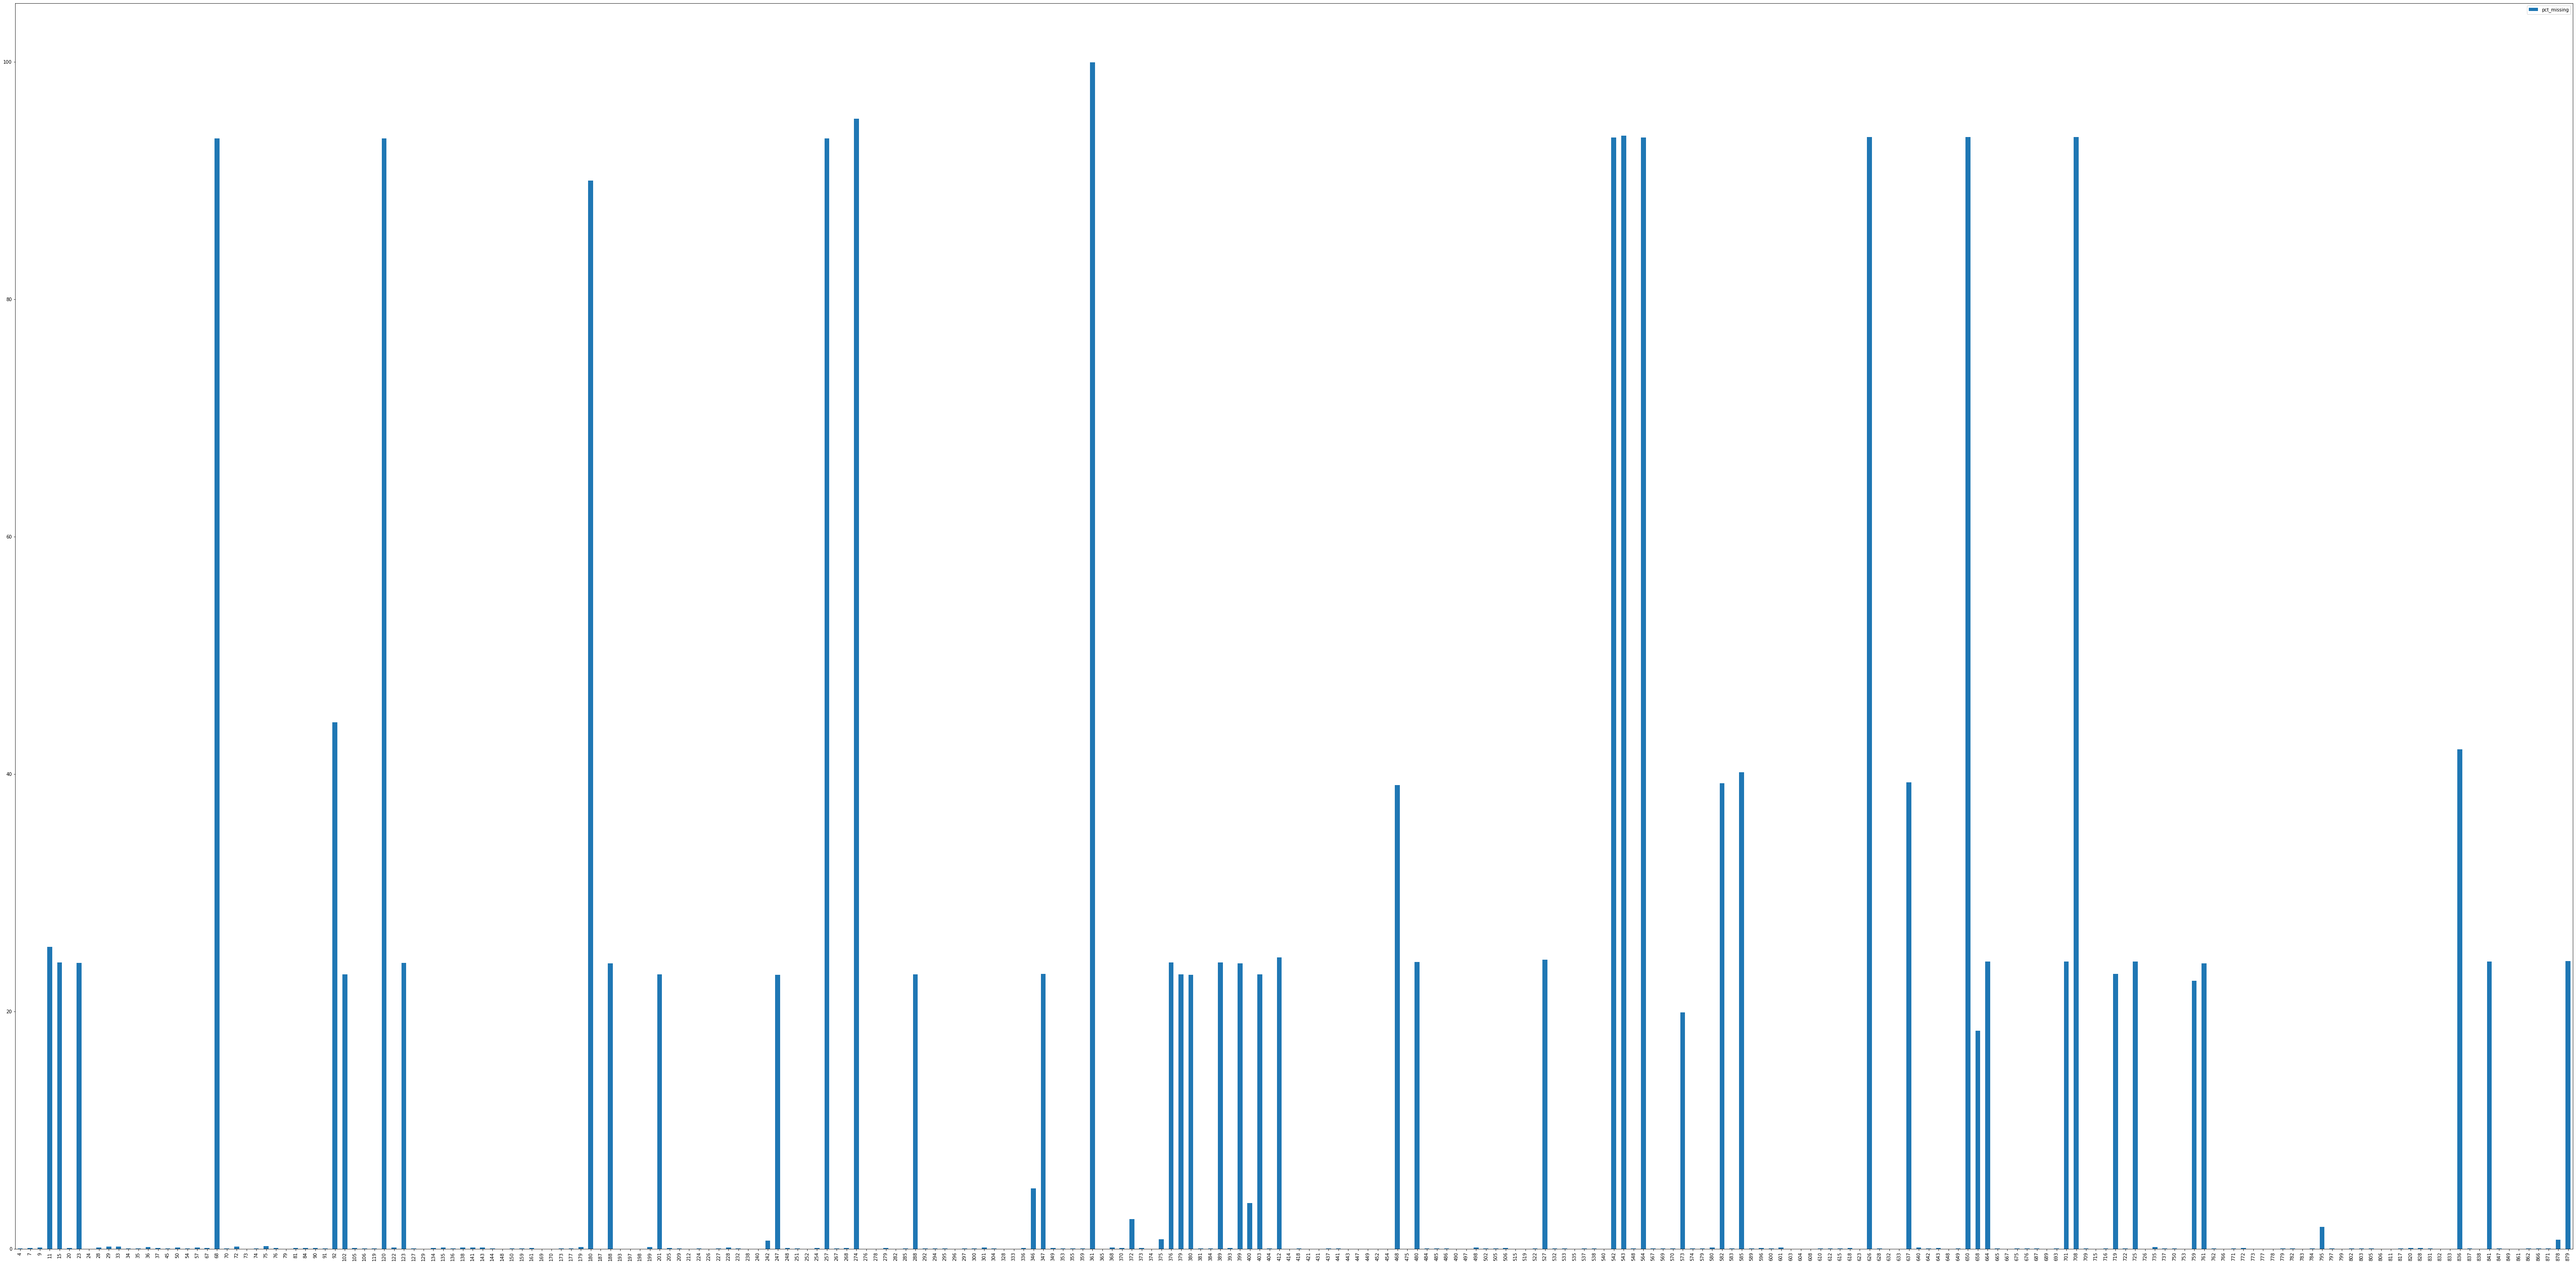

In [30]:
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(100,50))
plt.show()

In [31]:
# dropping columns with more than 40% null values
_60_pct_missing_cols_list = list(pct_missing_df.loc[pct_missing_df.pct_missing > 60, 'col'].values)
df.drop(columns=_60_pct_missing_cols_list, inplace=True)

In [32]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        med = df[col].median() #impute with the median
        df[col] = df[col].fillna(med)

In [33]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    if num_missing > 0:  # impute values only for columns that have missing values
        mod = df[col].describe()['top'] # impute with the most frequently occuring value
        df[col] = df[col].fillna(mod)

In [34]:
df = pd.get_dummies(df)
df.shape

(48300, 908)

In [35]:
df['hi_flag'].value_counts()

0    46182
1     2118
Name: hi_flag, dtype: int64

In [36]:
y = df.hi_flag
X = df.drop(['hi_flag','id'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.values, y.values, test_size=0.1)

#my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#train_X = my_imputer.fit_transform(train_X)
#test_X = my_imputer.transform(test_X)

In [37]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(train_X, train_y)



In [38]:
X_train_under.shape

(3826, 906)

In [39]:
#  rf = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, n_jobs=-1, random_state=0)

In [40]:
# #train_X, test_X, train_y, test_y 

# rf.fit(X_train_under, y_train_under)
# rf_ypr = rf.predict(test_X)

# rf_yprob = rf.predict_proba(test_X)

# # Let's evaluate our RF
# conf = confusion_matrix(test_y,rf_ypr)
# ConfusionMatrixDisplay(conf).plot()
# plt.show()

# # Calculate the ROC curve points
# fpr, tpr, _ = roc_curve(test_y, rf_yprob[:,1]) #just take yprob of positive class

# # Save the AUC in a variable to display it. Round it first
# auc = np.round(roc_auc_score(y_true = test_y, y_score = rf_yprob[:,1]), decimals = 3)

# # Create and show the plot
# plt.plot(fpr,tpr,label=f"Bankloan RF, auc={auc}")
# plt.legend(loc=4)
# plt.show()

In [41]:
# import sys
# import numpy
# numpy.set_printoptions(threshold=sys.maxsize)
# rf_ypr


In [42]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
# # We now create and fit trees from max depth 1 to max depth 40. 
# # The purpose is to compute accuracy score and the scoring method is cross validation.


# # #train_X, test_X, train_y, test_y 
# from sklearn.pipeline import Pipeline
# a=[]
# b=[]
# for i in range(1,20):
#     M = Pipeline([('dt',DecisionTreeClassifier(max_depth = i))])
#     acc = cross_val_score(M,train_X,train_y,cv=5).mean()
#     a.append(i)
#     b.append(acc)
#     print(f'CV classification accuracy with depth {i}:{acc}')

# # Plot the CV score and maximum depth 
# plt.scatter(a,b)

# # Print the optimal max depth for the decision tree
# print(f'The optimal depth is {b.index(max(b))+1}')

In [44]:
# DTCtree = DecisionTreeClassifier(max_depth=1)
# DTCtree.fit(train_X, train_y)
# ypr = DTCtree.predict(test_X)
# yprob = DTCtree.predict_proba(test_X)
# # Plot confusion and ROC, compare with RF
# conf = confusion_matrix(test_y,ypr)
# ConfusionMatrixDisplay(conf).plot()
# plt.show()
# # Calculate the ROC curve points
# fpr2, tpr2, _ = roc_curve(test_y, yprob[:,1]) #just take yprob of positive class

# # Save the AUC in a variable to display it. Round it first
# auc2 = np.round(roc_auc_score(y_true = test_y, y_score = yprob[:,1]), decimals = 3)

# # Create and show the plot
# plt.plot(fpr2,tpr2,label=f"auc={auc2}")
# plt.legend(loc=4)
# plt.show()

In [45]:
# gb = XGBClassifier(max_depth=None, learning_rate=0.1, n_estimators=100, booster='gbtree', gamma=0.001, random_state=0)

In [46]:
# param_grid = dict({'n_estimators': [50, 1000],'max_depth': [1,10],'learning_rate' : [0.01, 0.1]})

# grid = GridSearchCV(gb, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, refit = False)
# grid.fit(X_train_under,y_train_under)

In [22]:
# display(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1000}

In [47]:
gbF = XGBClassifier(max_depth=1, learning_rate=0.1, n_estimators=1000, booster='gbtree',n_jobs=1, gamma=0.001, random_state=0)

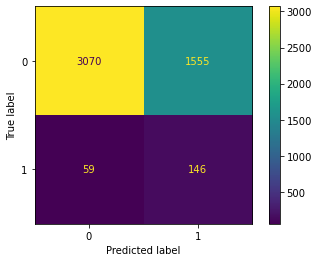

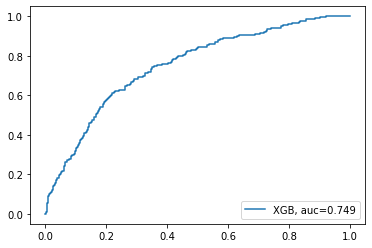

In [48]:
# Train and test
gbF.fit(X_train_under,y_train_under)
ypr = gbF.predict(test_X)
yprob = gbF.predict_proba(test_X)

# # Plot variable importance
# importances = gbF.feature_importances_
# indices = np.argsort(importances)[::-1] 

# f, ax = plt.subplots(figsize=(3,8))
# sns.barplot(y=X.columns,x=importances[indices],label="Total")
# plt.title("Variable Importance - XGBoost")
# ax.set(ylabel="Variable",xlabel="Variable Importance (Gini)")
# sns.despine(left=True, bottom=True)
# plt.show()

# Plot confusion and ROC, compare with RF
conf = confusion_matrix(test_y,ypr)
ConfusionMatrixDisplay(conf).plot()
plt.show()

# Calculate the ROC curve points
fpr2, tpr2, _ = roc_curve(test_y, yprob[:,1]) #just take yprob of positive class

# Save the AUC in a variable to display it. Round it first
auc2 = np.round(roc_auc_score(y_true = test_y, y_score = yprob[:,1]), decimals = 3)

# Create and show the plot
plt.plot(fpr2,tpr2,label=f"XGB, auc={auc2}")
plt.legend(loc=4)
plt.show()


In [49]:
ypr
yprob

array([[0.7327775 , 0.2672225 ],
       [0.82866436, 0.17133565],
       [0.43172002, 0.56828   ],
       ...,
       [0.81358534, 0.18641467],
       [0.74696076, 0.25303927],
       [0.39027804, 0.60972196]], dtype=float32)

In [68]:
df_holdout = pd.read_csv('2022_Competition_Holdout.csv')

df_holdout.drop(columns=_60_pct_missing_cols_list, inplace=True)
df_holdout = pd.get_dummies(df_holdout)

id = df_holdout.id

X = df_holdout.drop(['id'], axis=1).select_dtypes(exclude=['object']).values
X.shape
#df_holdout.shape


(12220, 906)

In [70]:
hold_out_pre_prob = gbF.predict_proba(X)
hold_out_pre_prob



array([[0.6029616 , 0.3970384 ],
       [0.4881909 , 0.5118091 ],
       [0.5453305 , 0.4546695 ],
       ...,
       [0.5915743 , 0.4084257 ],
       [0.5291951 , 0.4708049 ],
       [0.38351458, 0.6164854 ]], dtype=float32)

In [71]:
hold_out_pre_prob[12210]


array([0.7472757 , 0.25272432], dtype=float32)

In [80]:
Prob_df = pd.DataFrame(hold_out_pre_prob)
Index_Prob_df = pd.concat([id, Prob_df], axis=1)
Index_Prob = Index_Prob_df.drop(0,axis=1)
Index_Prob

,id,1
0,100093066.0,0.397038
1,100313000.0,0.511809
2,100330875.0,0.454670
3,100346385.0,0.301110
4,100443164.0,0.285797
...,...,...
12215,999896529.0,0.475475
12216,999899065.0,0.650275
12217,999946210.0,0.408426
12218,999984658.0,0.470805


In [83]:
Index_Prob['rank'] = Index_Prob[1].rank(ascending = False)

In [85]:
Index_Prob.to_excel("CC_output.xlsx")  